# HW2: Algorithm Implementation and Basic Model Selection

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Data Loading

In [2]:
dataset = pd.read_csv("virus_data.csv")
random_state = 17 + 75
train, test = train_test_split(dataset, test_size=0.2, random_state=random_state)

preprocessed_train = pd.read_csv("train_df_prepared.csv")
preprocessed_test = pd.read_csv("test_df_prepared.csv")

preprocessed_train = pd.concat([preprocessed_train.reset_index(drop=True), 
                    train['blood_type'].reset_index(drop=True)], axis=1)

preprocessed_test = pd.concat([preprocessed_test.reset_index(drop=True), 
                    test['blood_type'].reset_index(drop=True)], axis=1)

preprocessed_test


,patient_id,age,sex,weight,current_location,num_of_siblings,happiness_score,household_income,PCR_02,conversations_per_day,...,PCR_05,PCR_06,PCR_07,PCR_08,PCR_09,PCR_10,spread,risk,SpecialProperty,blood_type
0,820,6,F,33.1,0,3,5,0.1,0.098034,5,...,-1.205001,0.414230,0.694846,-0.466693,1.097146,0.971034,-1,1,False,O-
1,1084,48,M,73.8,0,1,9,1.5,-0.403437,4,...,-1.092120,-0.200697,1.327957,0.496580,-0.839951,4.048224,1,-1,False,A-
2,11,24,F,51.1,0,2,10,1.7,-0.116345,4,...,0.161001,-0.312766,-0.504885,-0.182148,0.279397,0.787677,1,1,True,O+
3,651,35,F,67.2,0,2,11,0.5,-0.153851,5,...,-0.350029,-0.456274,0.417658,-0.724930,-0.246166,0.183791,-1,1,False,A+
4,1136,9,F,35.7,0,0,10,0.6,-0.346050,4,...,-0.255292,-0.005658,0.641746,-0.650153,1.414323,-0.060518,-1,-1,True,B+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,890,40,M,65.5,0,2,9,0.8,-0.071114,4,...,0.329568,0.129631,0.320145,-0.521760,-1.290580,-0.925997,1,-1,False,AB+
246,436,26,F,57.7,0,2,9,0.7,0.274300,5,...,-0.600709,0.043492,-1.027059,-0.245630,-1.106906,2.117156,-1,1,True,O+
247,1108,48,F,57.5,0,3,8,0.7,-0.214757,4,...,-0.094528,0.291041,0.431799,0.367811,-0.339372,0.256957,-1,1,True,O+
248,294,56,F,81.9,0,3,10,0.2,-0.396241,8,...,-0.645325,-0.536436,1.611323,-0.613607,0.325144,0.736135,1,1,False,A+


# Part 1: Basic model selection with k-Nearest Neighbors

In [3]:
def visualize_clf(clf, X, Y, title, 
                  xlabel, ylabel,
                  marker_size=50,
                  grid_length=300,
                  linewidths=None):
    import matplotlib.pyplot as plt
    import pandas as pd
    from matplotlib.colors import ListedColormap
    
    if isinstance(X, pd.DataFrame):
        X = X.to_numpy()
        
    # For internal use here, make sure labels are 0 and 1
    Y = np.ravel(Y).astype(int)
    labels = set(Y)
    assert len(labels) == 2, "Can only visualize two unique labels"

    if labels == set([-1,1]):
      Y = (Y + 1) // 2
      labels = set(Y)
    
    assert labels == set([0,1]), "Could not handle given labels"

    plt.figure(figsize=(8, 8))

    # Parameters
    n_classes = 2
    markers = ["D", "o"]
    palette = sns.color_palette("hls", 2)
    custom_cmap = ListedColormap(palette.as_hex())

    x_delta = np.abs(X[:, 0].max() - X[:, 0].min()) * 0.1
    y_delta = np.abs(X[:, 1].max() - X[:, 1].min()) * 0.1
    x_min, x_max = X[:, 0].min() - x_delta, X[:, 0].max() + x_delta
    y_min, y_max = X[:, 1].min() - y_delta, X[:, 1].max() + y_delta
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, grid_length),
                         np.linspace(y_min, y_max, grid_length))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    cs = plt.contourf(xx, yy, Z, cmap=custom_cmap, alpha=0.35)

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(alpha=0.75)

    # Plot the training points
    for i, color, marker in zip(labels, palette, markers):
        idx = np.where(Y == i)
        plt.scatter(X[idx, 0], X[idx, 1], color=color,
                    marker=marker,
                    edgecolor='white', s=marker_size,
                    linewidths=linewidths)

    plt.title(title, fontsize=20)
    plt.axis("tight")
    plt.show()
   

## (Q1) - Visualization and basic analysis

c:\Users\sherh\anaconda3\envs\LilachBase\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


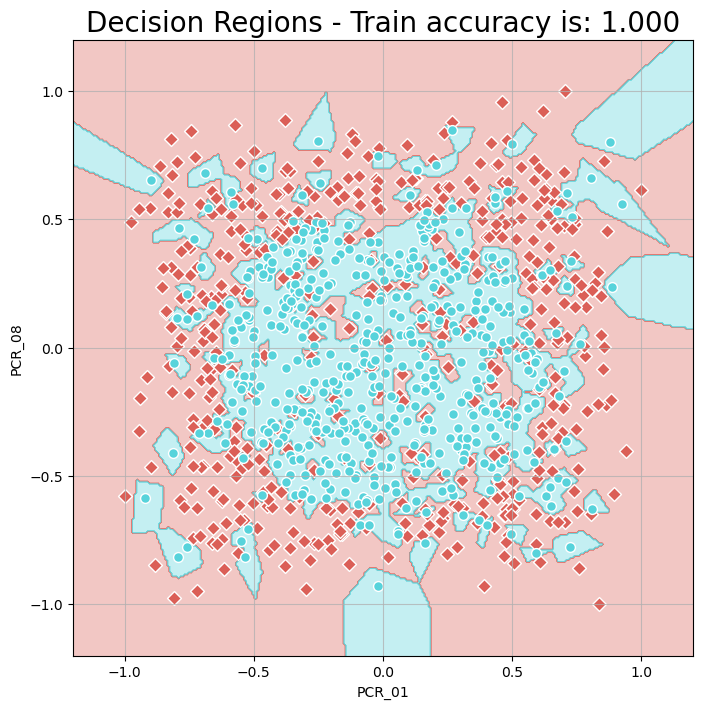

c:\Users\sherh\anaconda3\envs\LilachBase\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


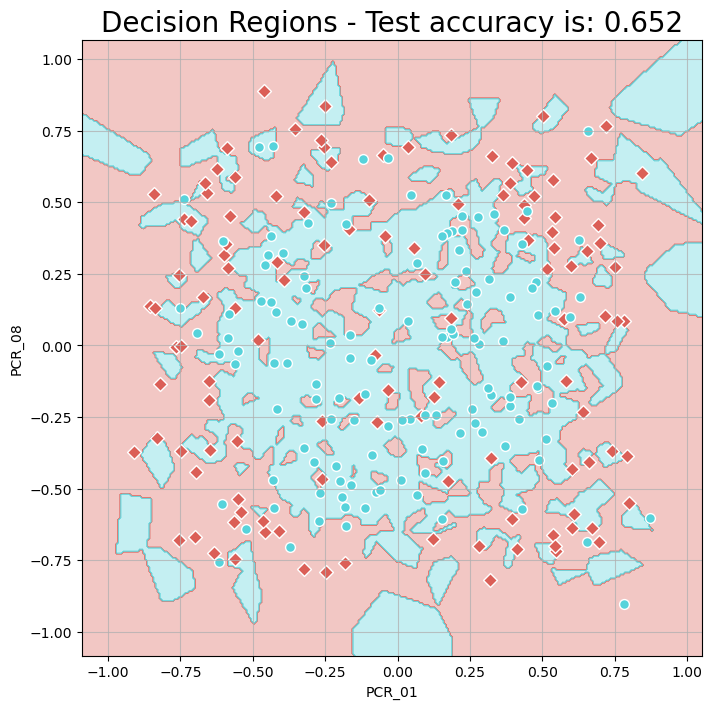

In [4]:
from sklearn.neighbors import KNeighborsClassifier

spread_pred_train = preprocessed_train[['PCR_01','PCR_08']]
spread_pred_label_train = preprocessed_train['spread']
spread_pred_test = preprocessed_test[['PCR_01','PCR_08']]
spread_pred_label_test = preprocessed_test['spread']

knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(spread_pred_train, spread_pred_label_train)

visualize_clf(knn, spread_pred_train, spread_pred_label_train, "Decision Regions - Train accuracy is: {:.3f}".format(knn.score(spread_pred_train, spread_pred_label_train)), "PCR_01", "PCR_08")
visualize_clf(knn, spread_pred_test, spread_pred_label_test, "Decision Regions - Test accuracy is: {:.3f}".format(knn.score(spread_pred_test, spread_pred_label_test)), "PCR_01", "PCR_08")

## (Q2)

In [5]:
from sklearn.model_selection import cross_validate

k_list = list(range(1, 20, 2)) + list(range(20, 695, 65))
train_scores = []
validation_scores = []

for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_validate(knn, spread_pred_train, spread_pred_label_train, cv=8, scoring='accuracy', return_train_score=True)

    train_scores.append(scores['train_score'].mean())
    validation_scores.append(scores['test_score'].mean())


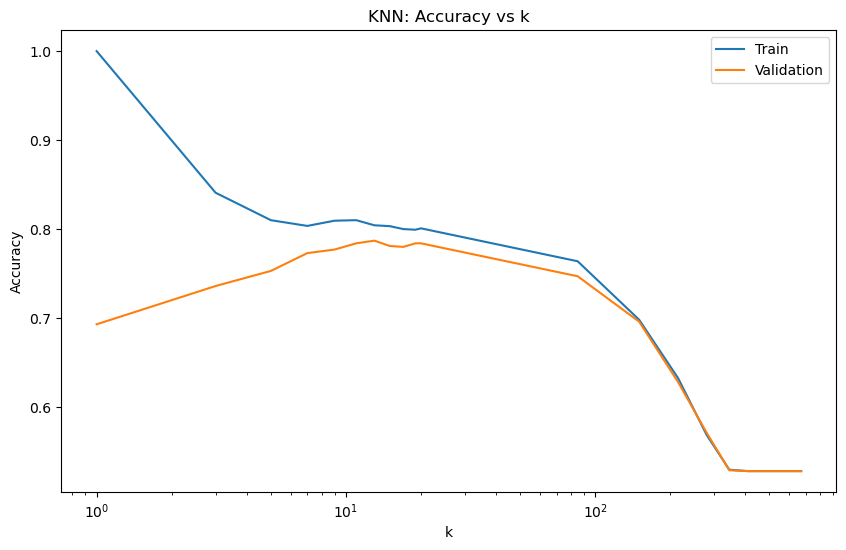

Best k value is:  13


In [6]:
plt.figure(figsize=(10, 6))
plt.semilogx(k_list, train_scores, label='Train')
plt.semilogx(k_list, validation_scores, label='Validation')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('KNN: Accuracy vs k')
plt.legend()
plt.show()

k_max_ind = np.argmax(validation_scores)
k_max = k_list[k_max_ind]
print("Best k value is: ", k_max)

## (Q3)

c:\Users\sherh\anaconda3\envs\LilachBase\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


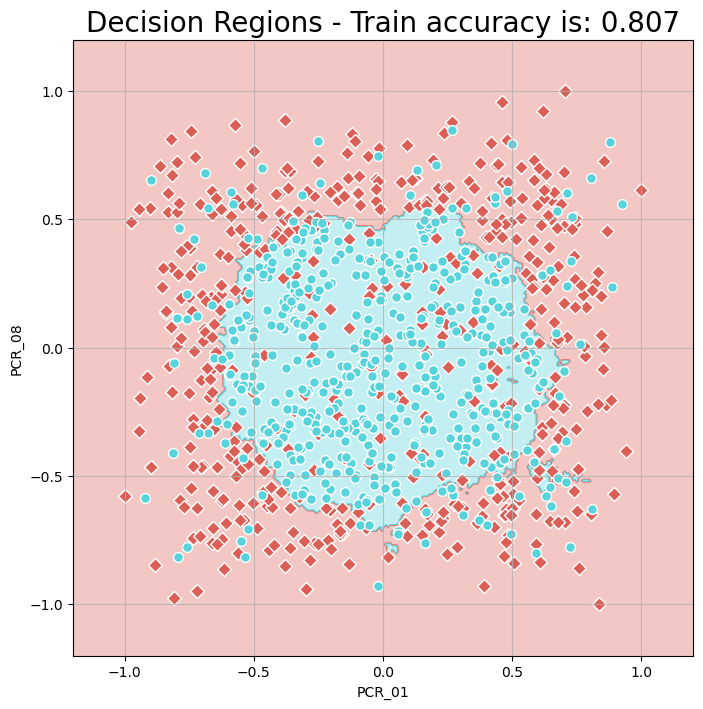

c:\Users\sherh\anaconda3\envs\LilachBase\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


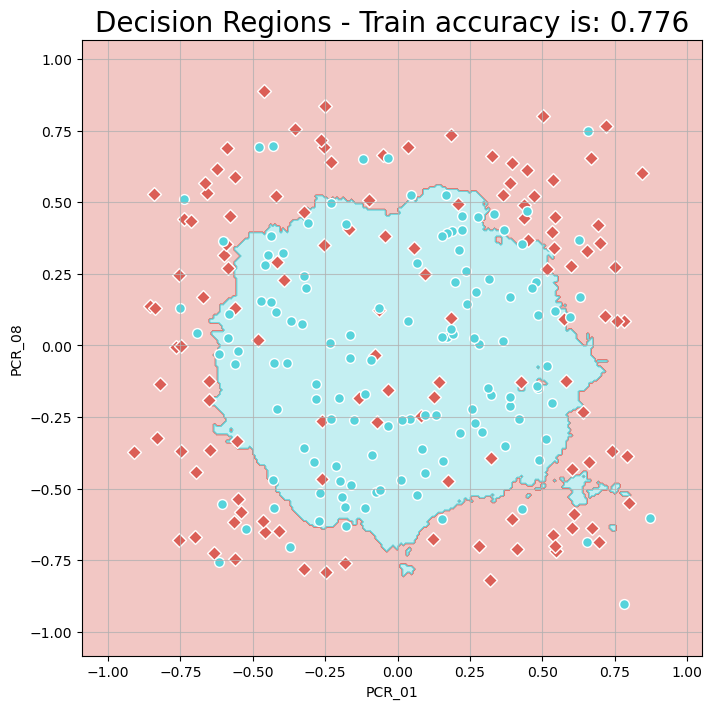

In [ ]:
knn = KNeighborsClassifier(n_neighbors=k_max)

knn.fit(spread_pred_train, spread_pred_label_train)

visualize_clf(knn, spread_pred_train, spread_pred_label_train, "Decision Regions - Train accuracy is: {:.3f}".format(knn.score(spread_pred_train, spread_pred_label_train)), "PCR_01", "PCR_08")
visualize_clf(knn, spread_pred_test, spread_pred_label_test, "Decision Regions - Test accuracy is: {:.3f}".format(knn.score(spread_pred_test, spread_pred_label_test)), "PCR_01", "PCR_08")

# Part 2: Decision trees

## (Q5)

In [8]:
id3_train = preprocessed_train[['PCR_04','PCR_06','SpecialProperty']]
id3_train_label = preprocessed_train[['risk']]
id3_test = preprocessed_test[['PCR_04','PCR_06','SpecialProperty']]
id3_test_label = preprocessed_test[['risk']]

Train accuracy is: 0.684


[Text(0.5, 0.875, 'SpecialProperty <= 0.5\nentropy = 1.0\nsamples = 1000\nvalue = [504, 496]\nclass = risk'),
 Text(0.25, 0.625, 'PCR_04 <= 0.477\nentropy = 0.944\nsamples = 497\nvalue = [180, 317]\nclass = no risk'),
 Text(0.125, 0.375, 'PCR_06 <= -0.461\nentropy = 0.989\nsamples = 400\nvalue = [175, 225]\nclass = no risk'),
 Text(0.0625, 0.125, 'entropy = 0.571\nsamples = 74\nvalue = [10, 64]\nclass = no risk'),
 Text(0.1875, 0.125, 'entropy = 1.0\nsamples = 326\nvalue = [165, 161]\nclass = risk'),
 Text(0.375, 0.375, 'PCR_06 <= 0.12\nentropy = 0.293\nsamples = 97\nvalue = [5, 92]\nclass = no risk'),
 Text(0.3125, 0.125, 'entropy = 0.451\nsamples = 53\nvalue = [5, 48]\nclass = no risk'),
 Text(0.4375, 0.125, 'entropy = 0.0\nsamples = 44\nvalue = [0, 44]\nclass = no risk'),
 Text(0.75, 0.625, 'PCR_06 <= 0.273\nentropy = 0.939\nsamples = 503\nvalue = [324, 179]\nclass = risk'),
 Text(0.625, 0.375, 'PCR_04 <= -0.354\nentropy = 0.999\nsamples = 340\nvalue = [175.0, 165.0]\nclass = risk')

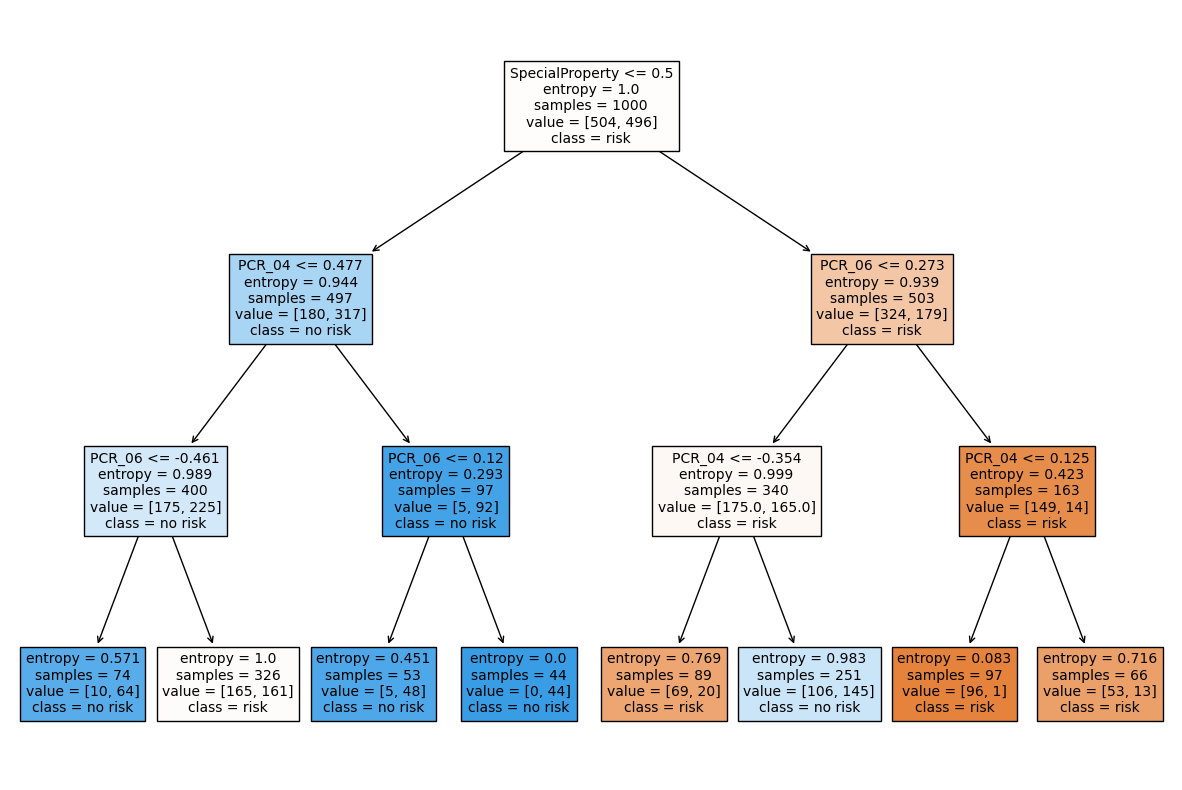

In [9]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

id3 = DecisionTreeClassifier(criterion='entropy', max_depth=3)
id3 = id3.fit(id3_train, id3_train_label)
print("Train accuracy is: {:.3f}".format(id3.score(id3_train, id3_train_label)))
plt.figure(figsize=(15, 10))
plot_tree(id3, feature_names=['PCR_04', 'PCR_06', 'SpecialProperty'], class_names=['risk', 'no risk'], filled=True, fontsize=10)

# (Q6)

In [10]:
from sklearn.model_selection import GridSearchCV


max_depth_range = range(5, 25)
min_samples_range = range(1, 20)
param_grid = {'max_depth': max_depth_range, 'min_samples_leaf': min_samples_range}

grid_search = GridSearchCV(DecisionTreeClassifier(criterion='entropy'), param_grid, cv=5, scoring='accuracy', return_train_score=True, error_score='raise')
grid_search.fit(id3_train, id3_train_label)


GridSearchCV(cv=5, error_score='raise',
             estimator=DecisionTreeClassifier(criterion='entropy'),
             param_grid={'max_depth': range(5, 25),
                         'min_samples_leaf': range(1, 20)},
             return_train_score=True, scoring='accuracy')

In [11]:
validation_acc_df = pd.DataFrame(grid_search.cv_results_['mean_test_score'].reshape(len(max_depth_range), len(min_samples_range)), index=max_depth_range, columns=min_samples_range)
train_acc_df = pd.DataFrame(grid_search.cv_results_['mean_train_score'].reshape(len(max_depth_range), len(min_samples_range)), index=max_depth_range, columns=min_samples_range)

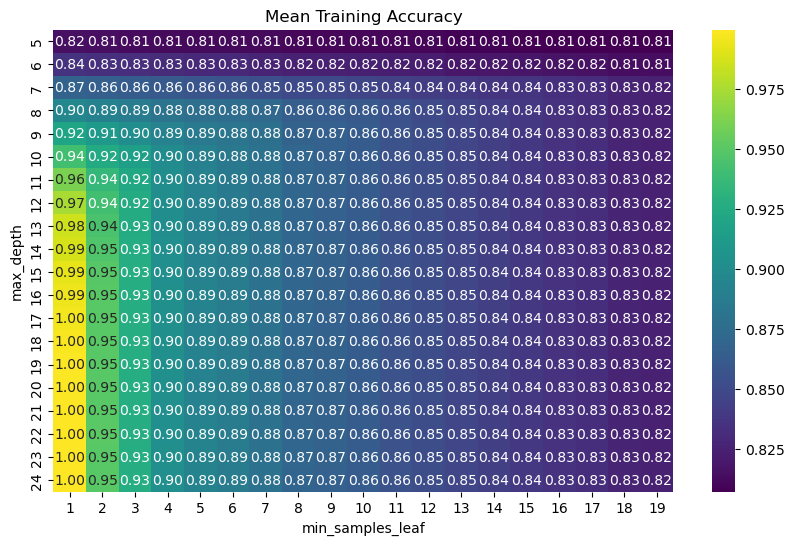

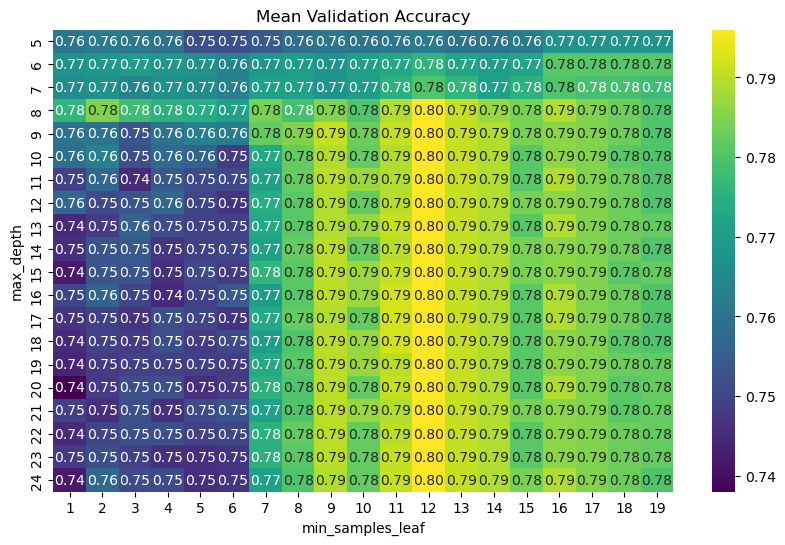

(380,)

In [12]:
plt.figure(figsize=(10, 6))
h = sns.heatmap(train_acc_df, cmap='viridis', annot=True, fmt=".2f")
plt.title('Mean Training Accuracy')
plt.xlabel('min_samples_leaf')
plt.ylabel('max_depth')
plt.show()
plt.figure(figsize=(10, 6))
h = sns.heatmap(validation_acc_df, cmap='viridis', annot=True, fmt=".2f")
plt.title('Mean Validation Accuracy')
plt.xlabel('min_samples_leaf')
plt.ylabel('max_depth')
plt.show()


grid_search.cv_results_['mean_test_score'].shape

## (Q8)

In [13]:
id3 = DecisionTreeClassifier(criterion='entropy', max_depth=8, min_samples_leaf=12)
id3 = id3.fit(id3_train, id3_train_label)
print("Train accuracy is: {:.3f}".format(id3.score(id3_train, id3_train_label)))
print("Test accuracy is: {:.3f}".format(id3.score(id3_test, id3_test_label)))


Train accuracy is: 0.858
Test accuracy is: 0.804


# Part 3: Linear SVM and the Polynomial kernel

In [14]:
from SoftSVM import SoftSVM

def numerical_subgradient(w, b, C, X, y, delta=1e-4):
    w_ = w.copy()
    g_w = np.zeros_like(w_)
    orig_objective = SoftSVM.loss(w_, b, C, X, y)
    for i in range(g_w.shape[0]):
        w_[i] += delta
        perturbed_objective = SoftSVM.loss(w_, b, C, X, y)
        w_[i] -= delta
        g_w[i] = (perturbed_objective - orig_objective) / delta

    g_b = (SoftSVM.loss(w_, b + delta, C, X, y) - orig_objective) / delta
    return g_w, g_b



def compare_gradients(X, y, deltas, C=1, REPEATS=100, figsize=(10, 6)):
    residual_means = []

    for delta in deltas:
        residuals = []

        for _ in range(REPEATS):
            # Randomize vectors in which the gradient is computed
            w = np.random.randn(X.shape[1])
            b = np.random.randn(1)

            # Compute the two types of gradients
            analytic_grad = SoftSVM.subgradient(w, b, C, X, y)[0]
            numeric_grad = numerical_subgradient(w, b, C, X, y, delta=delta)[0]

            residual = np.linalg.norm(numeric_grad - analytic_grad)
            residuals.append(residual)

        residual_means.append(np.mean(residuals))

    plt.figure(figsize=figsize)
    plt.title('Residuals of analytical and numerical gradients', fontsize=22)
    plt.plot(deltas, residual_means, linewidth=3)      
    plt.yscale('log')
    plt.xscale('log')
    plt.xlabel('$\delta$', fontsize=18)
    plt.ylabel(r'$\left\Vert \nabla_{w}p_{C}\left(w,b\right) - u_{\delta} \left(w,b\right)\right\Vert$', fontsize=18)

    plt.grid(alpha=0.5)
    plt.show()


## (Q9)

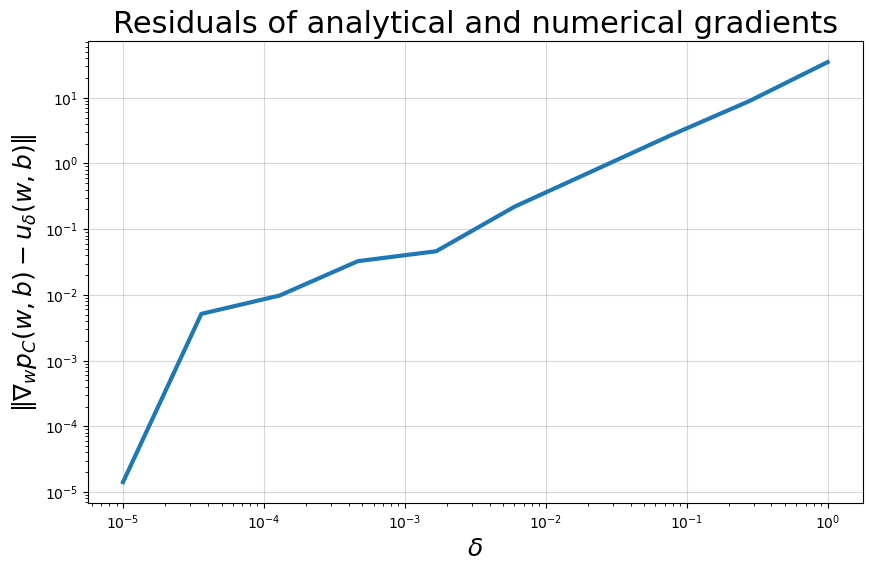

In [15]:
compare_gradients(np.array(spread_pred_train), np.array(spread_pred_label_train), deltas=np.logspace(-5, 0, 10))

## (Q11)

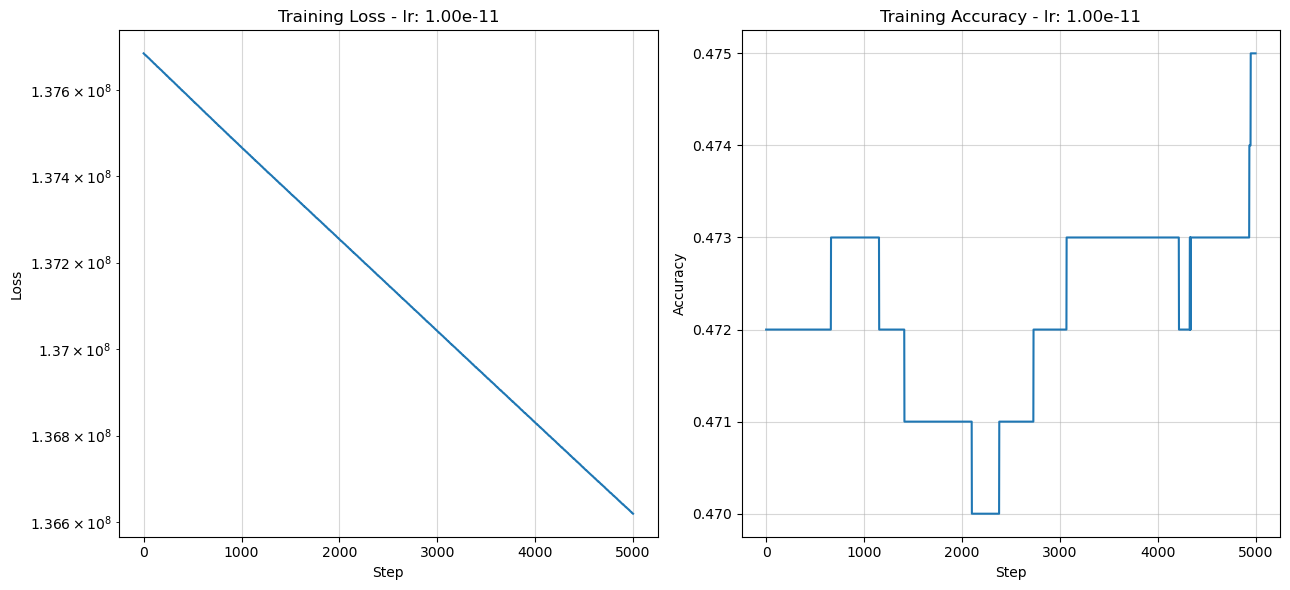

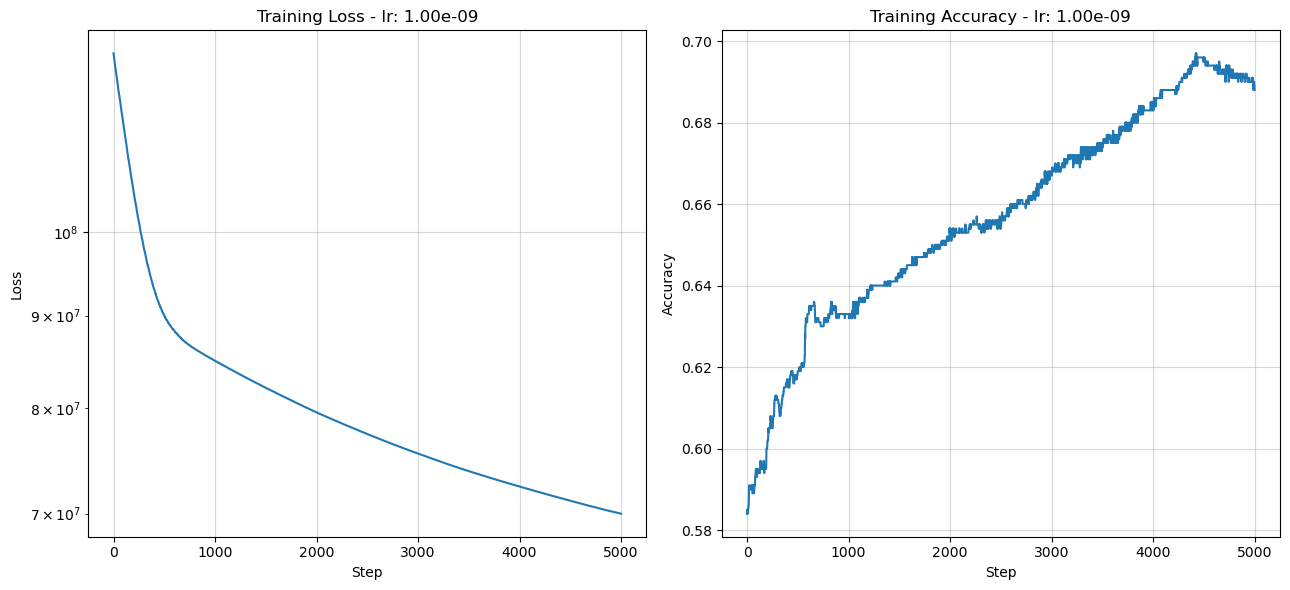

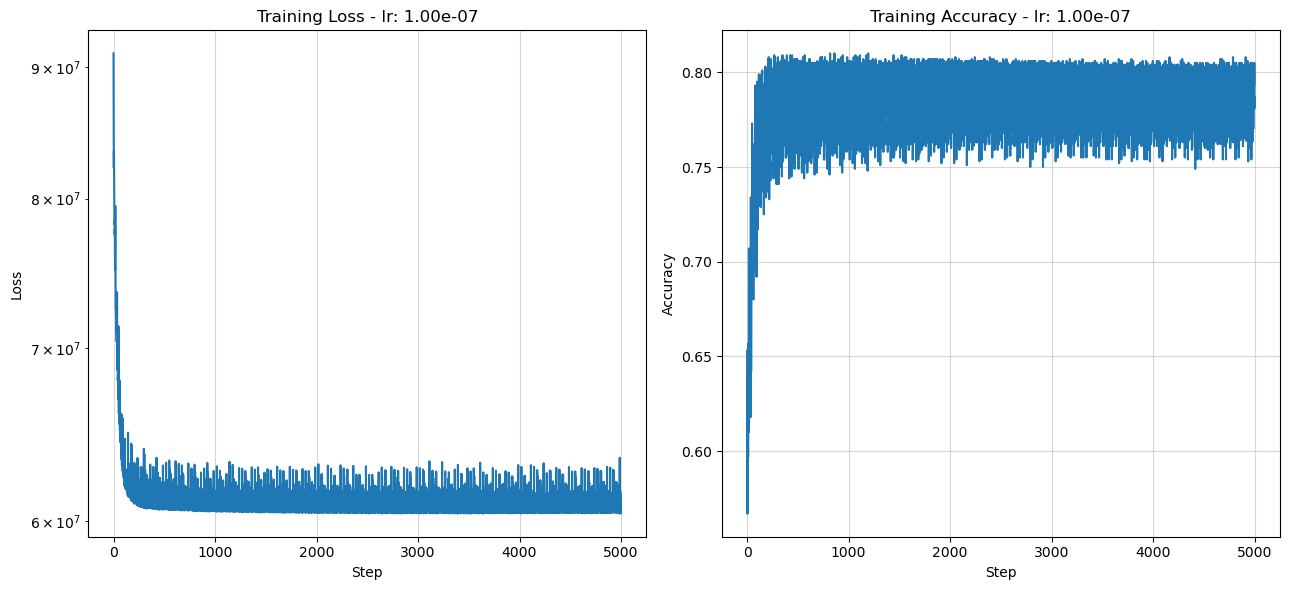

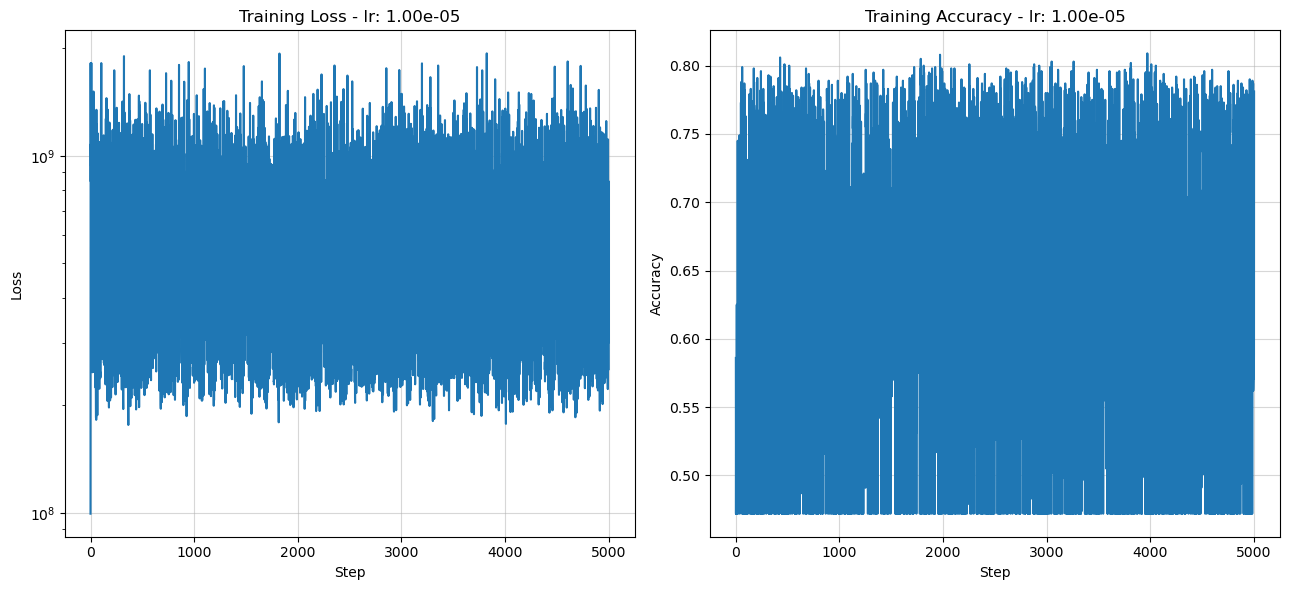

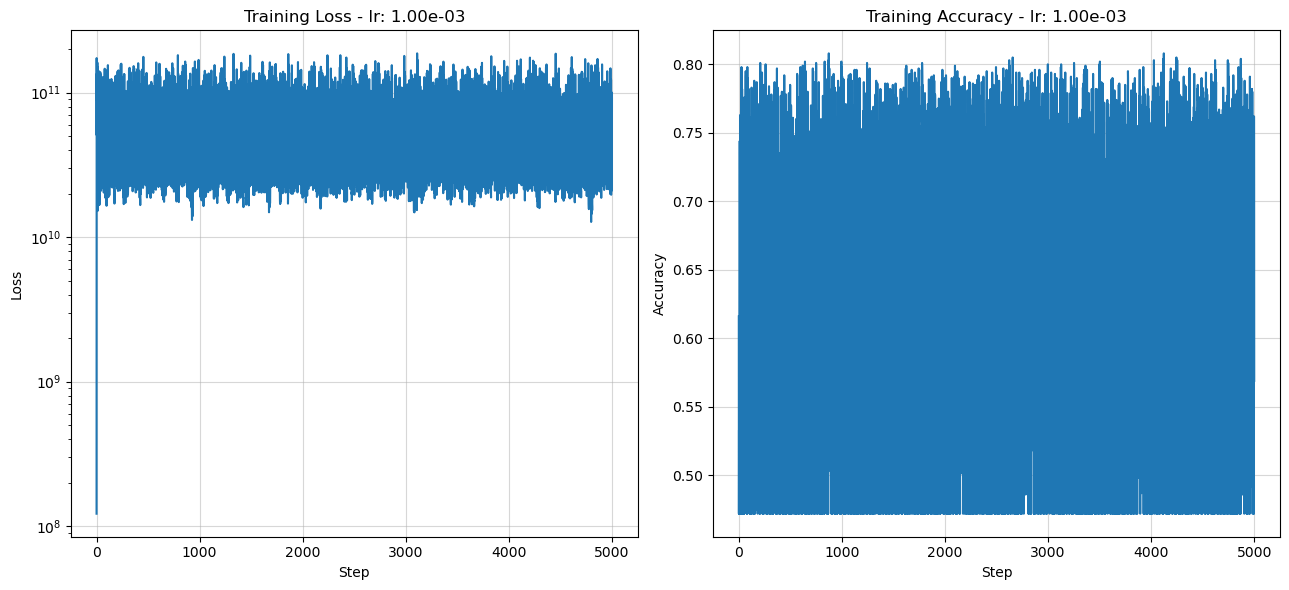

In [18]:
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler

C=1e5
lr_vec = np.logspace(-11, -3, 5)
for lr in lr_vec:
    clf = SoftSVM(C=C, lr=lr)
    X_train_poly = PolynomialFeatures(degree=3,).fit_transform(spread_pred_train)
    X_train_poly = MinMaxScaler(feature_range=(-1,1)).fit_transform(X_train_poly)
    losses, accuracies = clf.fit_with_logs(np.array(X_train_poly), np.array(spread_pred_label_train), max_iter=5000)
    plt.figure(figsize=(13, 6))
    plt.subplot(121), plt.grid(alpha=0.5), plt.title ("Training Loss - lr: {:.2e}".format(lr))
    plt.semilogy(losses), plt.xlabel("Step"), plt.ylabel("Loss")
    plt.subplot(122), plt.grid(alpha=0.5), plt.title ("Training Accuracy - lr: {:.2e}".format(lr))
    plt.plot(accuracies), plt.xlabel("Step"), plt.ylabel("Accuracy")
    plt.tight_layout()
    plt.show()

## (Q12)

In [25]:
from sklearn.pipeline import Pipeline

svm_clf = Pipeline([('feature_mapping', PolynomialFeatures(degree=3,)),
                    ('scaler', MinMaxScaler(feature_range=(-1,1))),
                    ('SVM', SoftSVM(C= 1e5 , lr=1e-7))])
svm_clf.fit(np.array(spread_pred_train), np.array(spread_pred_label_train))

Pipeline(steps=[('feature_mapping', PolynomialFeatures(degree=3)),
                ('scaler', MinMaxScaler(feature_range=(-1, 1))),
                ('SVM', SoftSVM(C=100000.0, lr=1e-07))])

c:\Users\sherh\anaconda3\envs\LilachBase\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but PolynomialFeatures was fitted without feature names
  warnings.warn(


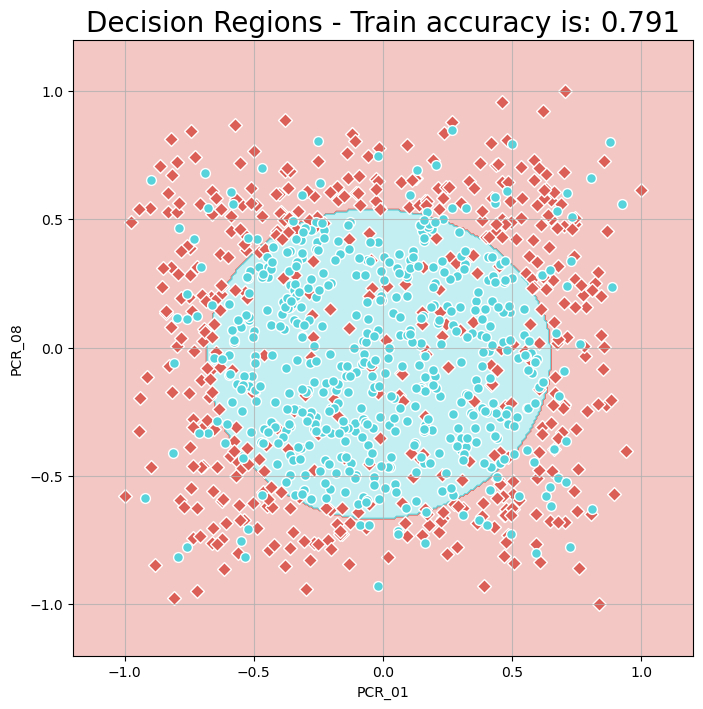

c:\Users\sherh\anaconda3\envs\LilachBase\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but PolynomialFeatures was fitted without feature names
  warnings.warn(


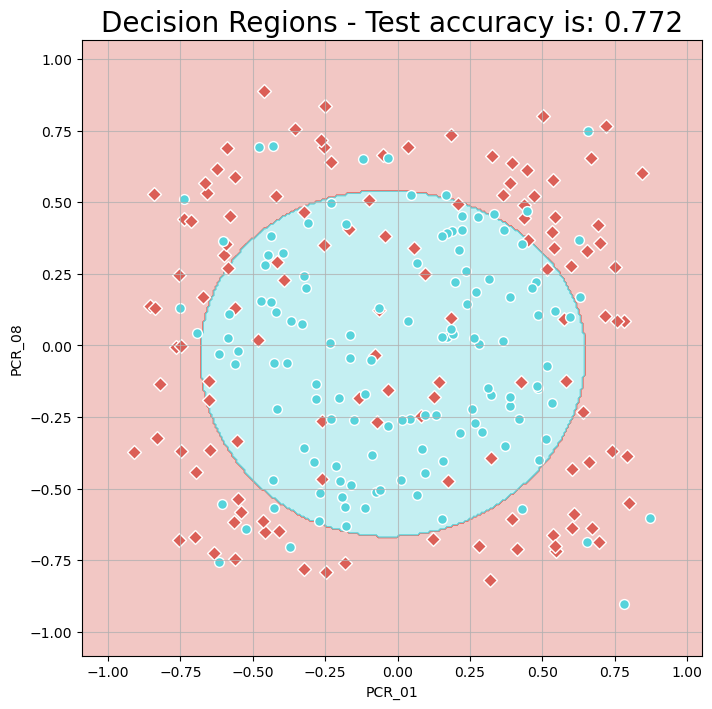

In [26]:
visualize_clf(svm_clf, spread_pred_train, spread_pred_label_train, "Decision Regions - Train accuracy is: {:.3f}".format(svm_clf.score(spread_pred_train, spread_pred_label_train)), "PCR_01", "PCR_08")
visualize_clf(svm_clf, spread_pred_test, spread_pred_label_test, "Decision Regions - Test accuracy is: {:.3f}".format(svm_clf.score(spread_pred_test, spread_pred_label_test)), "PCR_01", "PCR_08")

## (Q14)

c:\Users\sherh\anaconda3\envs\LilachBase\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


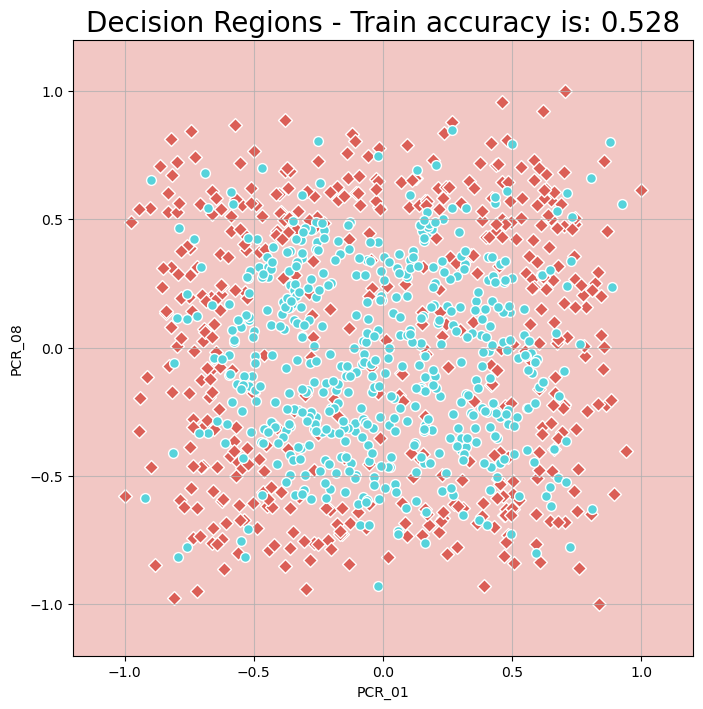

c:\Users\sherh\anaconda3\envs\LilachBase\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


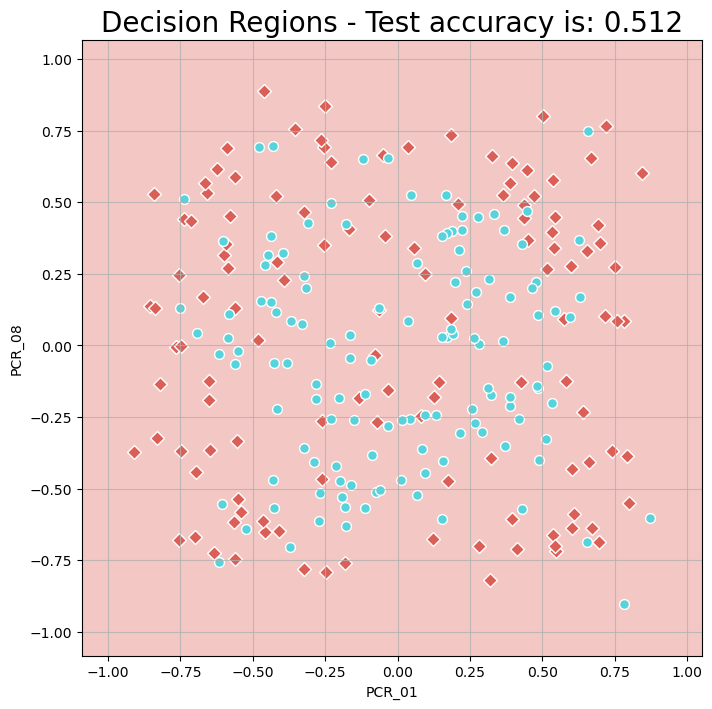

In [32]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline

svc_clf = make_pipeline(MinMaxScaler(feature_range=(-1,1)), SVC(gamma=1e-7))
svc_clf.fit(spread_pred_train, spread_pred_label_train)

visualize_clf(svc_clf, spread_pred_train, spread_pred_label_train, "Decision Regions - Train accuracy is: {:.3f}".format(svc_clf.score(spread_pred_train, spread_pred_label_train)), "PCR_01", "PCR_08")
visualize_clf(svc_clf, spread_pred_test, spread_pred_label_test, "Decision Regions - Test accuracy is: {:.3f}".format(svc_clf.score(spread_pred_test, spread_pred_label_test)), "PCR_01", "PCR_08")

c:\Users\sherh\anaconda3\envs\LilachBase\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


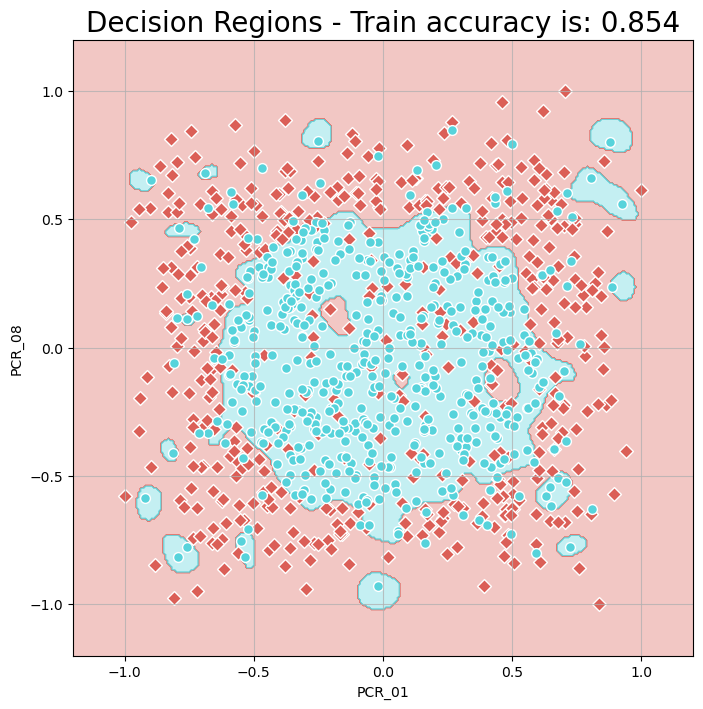

c:\Users\sherh\anaconda3\envs\LilachBase\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


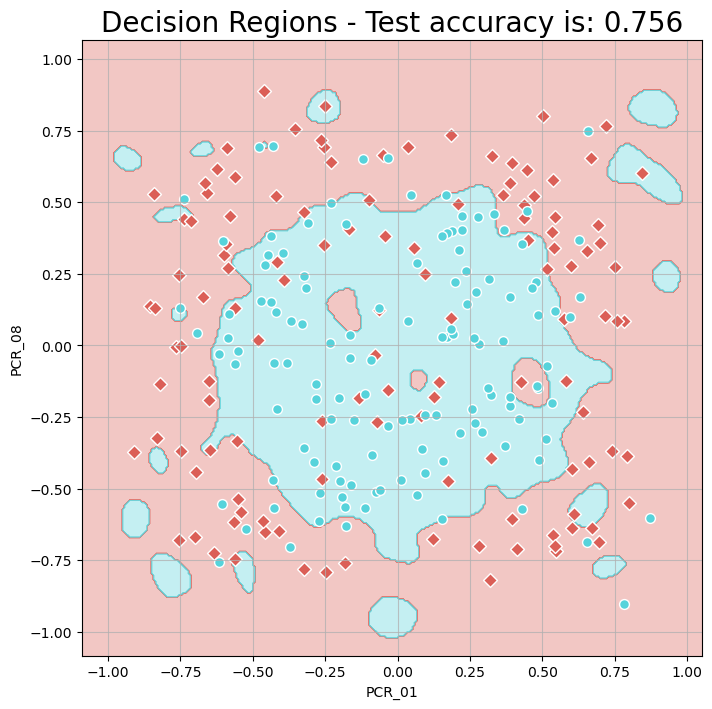

In [33]:
svc_clf = make_pipeline(MinMaxScaler(feature_range=(-1,1)), SVC(gamma=200))
svc_clf.fit(spread_pred_train, spread_pred_label_train)

visualize_clf(svc_clf, spread_pred_train, spread_pred_label_train, "Decision Regions - Train accuracy is: {:.3f}".format(svc_clf.score(spread_pred_train, spread_pred_label_train)), "PCR_01", "PCR_08")
visualize_clf(svc_clf, spread_pred_test, spread_pred_label_test, "Decision Regions - Test accuracy is: {:.3f}".format(svc_clf.score(spread_pred_test, spread_pred_label_test)), "PCR_01", "PCR_08")

c:\Users\sherh\anaconda3\envs\LilachBase\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


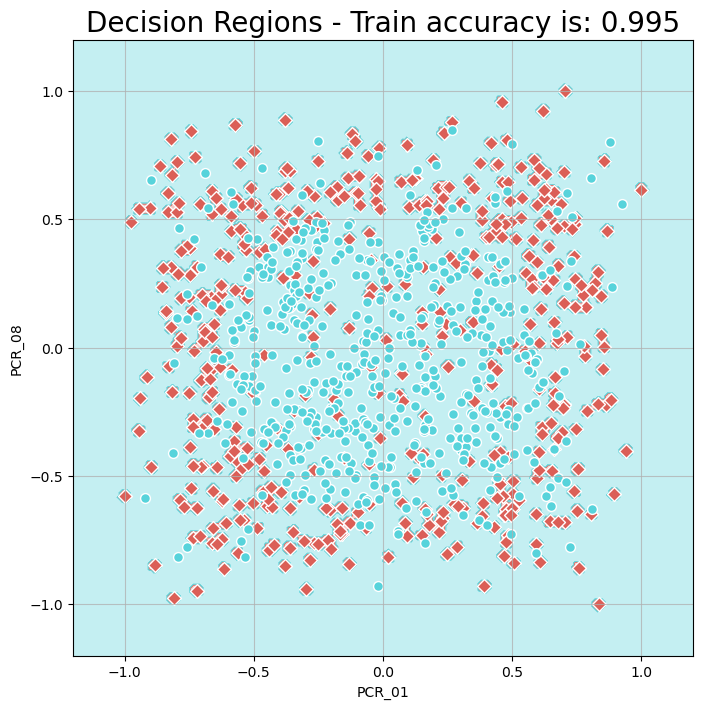

c:\Users\sherh\anaconda3\envs\LilachBase\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


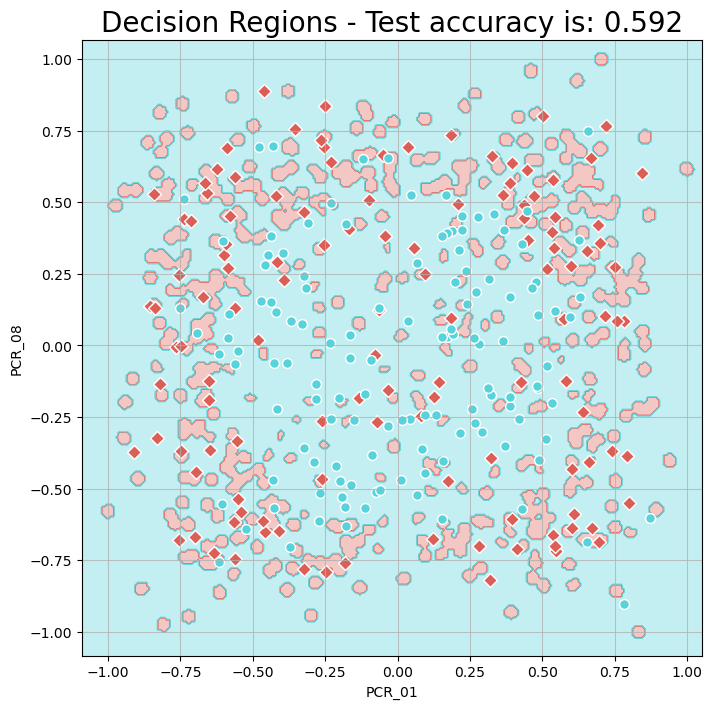

In [34]:
svc_clf = make_pipeline(MinMaxScaler(feature_range=(-1,1)), SVC(gamma=5000))
svc_clf.fit(spread_pred_train, spread_pred_label_train)

visualize_clf(svc_clf, spread_pred_train, spread_pred_label_train, "Decision Regions - Train accuracy is: {:.3f}".format(svc_clf.score(spread_pred_train, spread_pred_label_train)), "PCR_01", "PCR_08")
visualize_clf(svc_clf, spread_pred_test, spread_pred_label_test, "Decision Regions - Test accuracy is: {:.3f}".format(svc_clf.score(spread_pred_test, spread_pred_label_test)), "PCR_01", "PCR_08")